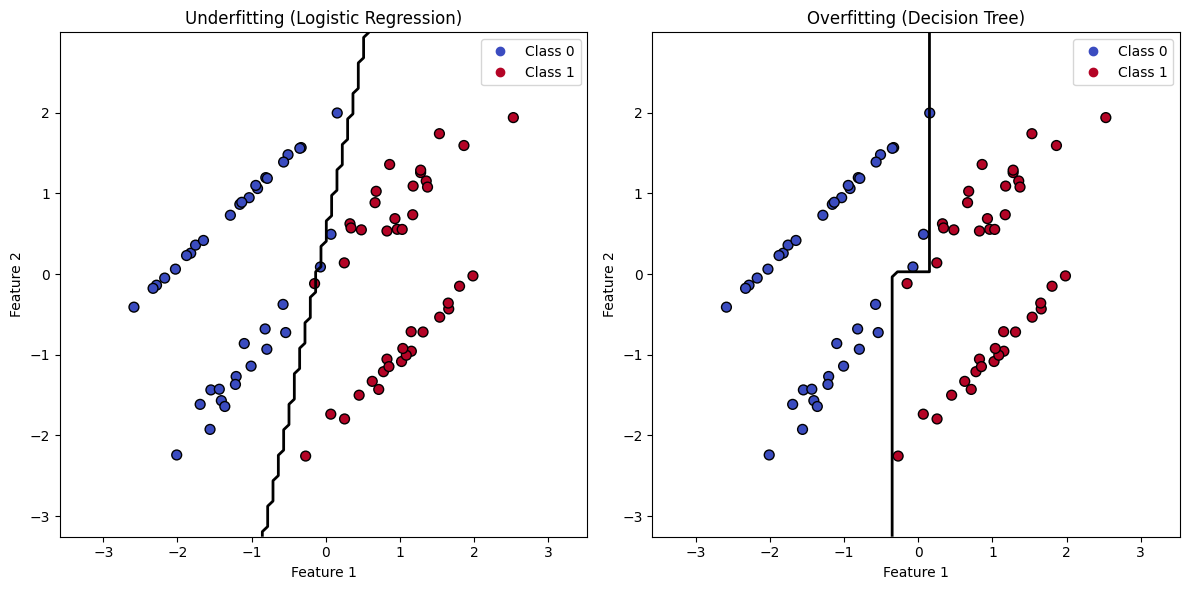

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Generate a simple 2D dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
underfitting_model = LogisticRegression()  # Simple model
overfitting_model = DecisionTreeClassifier(max_depth=10)  # Complex model

# Train the models
underfitting_model.fit(X_train, y_train)
overfitting_model.fit(X_train, y_train)

# Plot function to show decision boundary
def plot_decision_boundary(X, y, model, ax, title="Model"):
    # Get the minimum and maximum values for features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Plot the decision boundary as a line or curve
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary (in this case, just the line or curve)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')  # black line for decision boundary

    # Plotting the data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    # Add class labels
    ax.legend(handles=scatter.legend_elements()[0], labels=["Class 0", "Class 1"])

# Create a figure and subplots to compare underfitting and overfitting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for underfitting (Logistic Regression)
plot_decision_boundary(X_train, y_train, underfitting_model, axes[0], title="Underfitting (Logistic Regression)")

# Plot for overfitting (Decision Tree)
plot_decision_boundary(X_train, y_train, overfitting_model, axes[1], title="Overfitting (Decision Tree)")

# Show the plots
plt.tight_layout()
plt.show()
